# Текстовое описание набора данных
Датасет состоит из одного файла:

BankChurners.csv - база данных

Файл содержит следующие колонки:
1)	clientnum – идентификационный номер клиента;
2)	attrition flag – активность клиента;
3)	customer age – возраст клиента;
4)	gender – пол клиента;
5)	dependent count – количество иждивенцев;
6)	education level – уровень образования клиента;
7)	marital status – семейное положение клиента;
8)	income category – доход клиента;
9)	card category – категория кредитной карты клиента;
10)	months on book – срок использования кредитной карты;
11)	credit limit – лимит на выдачу кредита клиенту;
12)	avg open to buy – среднее количество потраченных денежных средств клиентом;
13)	remaining money – оставшиеся денежные средства.


# Выгрузка датасета и получение инофрмации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as px
import squarify

In [2]:
cards = pd.read_csv("BankChurners.csv", engine='python')

In [3]:
cards.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
cards = cards[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
              'Income_Category', 'Card_Category', 'Months_on_book', 'Credit_Limit', 'Avg_Open_To_Buy']]

In [5]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLIENTNUM        10127 non-null  int64  
 1   Attrition_Flag   10127 non-null  object 
 2   Customer_Age     10127 non-null  int64  
 3   Gender           10127 non-null  object 
 4   Dependent_count  10127 non-null  int64  
 5   Education_Level  10127 non-null  object 
 6   Marital_Status   10127 non-null  object 
 7   Income_Category  10127 non-null  object 
 8   Card_Category    10127 non-null  object 
 9   Months_on_book   10127 non-null  int64  
 10  Credit_Limit     10127 non-null  float64
 11  Avg_Open_To_Buy  10127 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 949.5+ KB


In [6]:
cards.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,41.0,46.0,52.0,73.0
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.0,2.0,3.0,5.0
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,31.0,36.0,40.0,56.0
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2555.0,4549.0,11067.5,34516.0
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1324.5,3474.0,9859.0,34516.0


In [7]:
cards.isna().sum()

CLIENTNUM          0
Attrition_Flag     0
Customer_Age       0
Gender             0
Dependent_count    0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
Months_on_book     0
Credit_Limit       0
Avg_Open_To_Buy    0
dtype: int64

In [8]:
cards.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book', 'Credit_Limit',
       'Avg_Open_To_Buy'],
      dtype='object')

In [9]:
cards.columns = cards.columns.str.lower()
cards.columns

Index(['clientnum', 'attrition_flag', 'customer_age', 'gender',
       'dependent_count', 'education_level', 'marital_status',
       'income_category', 'card_category', 'months_on_book', 'credit_limit',
       'avg_open_to_buy'],
      dtype='object')

In [10]:
cards.duplicated().sum()

0

In [11]:
cards.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clientnum        10127 non-null  int64  
 1   attrition_flag   10127 non-null  object 
 2   customer_age     10127 non-null  int64  
 3   gender           10127 non-null  object 
 4   dependent_count  10127 non-null  int64  
 5   education_level  10127 non-null  object 
 6   marital_status   10127 non-null  object 
 7   income_category  10127 non-null  object 
 8   card_category    10127 non-null  object 
 9   months_on_book   10127 non-null  int64  
 10  credit_limit     10127 non-null  float64
 11  avg_open_to_buy  10127 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.2 MB


In [12]:
for col in ['credit_limit']:
    cards[col] = cards[col].astype(int)

In [13]:
optimized = cards.copy()

col_int = cards.select_dtypes(include = ['int'])
converted_int = col_int.apply(pd.to_numeric, downcast = 'unsigned')
optimized[converted_int.columns] = converted_int

for col in cards.select_dtypes(include = ['object']).columns:
    optimized[col] = optimized[col].astype('string')
    
cards = optimized

In [14]:
cards.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clientnum        10127 non-null  uint32 
 1   attrition_flag   10127 non-null  string 
 2   customer_age     10127 non-null  uint8  
 3   gender           10127 non-null  string 
 4   dependent_count  10127 non-null  uint8  
 5   education_level  10127 non-null  string 
 6   marital_status   10127 non-null  string 
 7   income_category  10127 non-null  string 
 8   card_category    10127 non-null  string 
 9   months_on_book   10127 non-null  uint8  
 10  credit_limit     10127 non-null  uint16 
 11  avg_open_to_buy  10127 non-null  float64
dtypes: float64(1), string(6), uint16(1), uint32(1), uint8(3)
memory usage: 3.9 MB


In [15]:
cards['remaining_money'] = cards['credit_limit'] - cards['avg_open_to_buy']

In [16]:
cards.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,credit_limit,avg_open_to_buy,remaining_money
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,12691,11914.0,777.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,8256,7392.0,864.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,3418,3418.0,0.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3313,796.0,2517.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4716,4716.0,0.0


In [17]:
cards['card_category'].unique()

cards['Blue'] = cards['card_category'] == 'Blue' if 1 else 0
cards['Silver'] = cards['card_category'] == 'Silver' if 1 else 0
cards['Gold'] = cards['card_category'] == 'Gold' if 1 else 0
cards['Platinum'] = cards['card_category'] == 'Platinum' if 1 else 0
cards.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,credit_limit,avg_open_to_buy,remaining_money,Blue,Silver,Gold,Platinum
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,12691,11914.0,777.0,True,False,False,False
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,8256,7392.0,864.0,True,False,False,False
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,3418,3418.0,0.0,True,False,False,False
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3313,796.0,2517.0,True,False,False,False
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4716,4716.0,0.0,True,False,False,False


# Визуальное исследование датасета

In [18]:
card_tariff = cards['card_category'].value_counts()
card_tariff = pd.DataFrame({'card_category': card_tariff.index, 'count': card_tariff.values}).sort_values('card_category')
card_tariff.head(100).sort_values(by=['count'], ascending = False)

,card_category,count
0,Blue,9436
1,Silver,555
2,Gold,116
3,Platinum,20


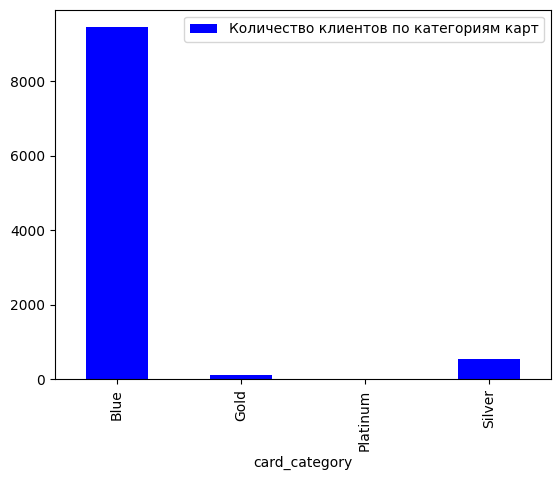

In [19]:
axes = card_tariff.plot.bar(x = 'card_category', y = 'count', label = 'Количество клиентов по категориям карт', color = ['blue'])

In [20]:
age = cards['customer_age'].value_counts()
age = pd.DataFrame({'customer_age': age.index, 'count': age.values}).sort_values('customer_age')
age.head(100).sort_values(by=['count'], ascending = False)

,customer_age,count
0,44,500
1,49,495
2,46,490
3,45,486
4,47,479
5,43,473
6,48,472
7,50,452
8,42,426
9,51,398


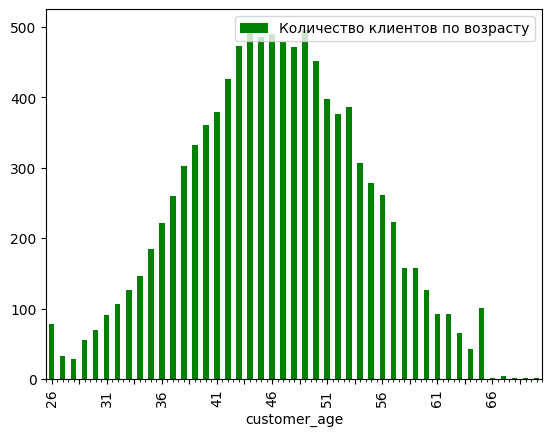

In [21]:
ace = age.plot.bar(x = 'customer_age', y = 'count', label = 'Количество клиентов по возрасту', color = ['green'])
ace.xaxis.set_major_locator(plt.MaxNLocator(20))
ace.xaxis.set_minor_locator(plt.MaxNLocator(100))

In [22]:
top_money = cards.groupby('income_category')['income_category'].count()
money = top_money.index

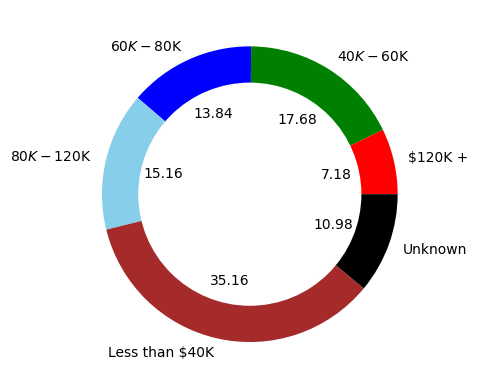

In [23]:
my_circle = plt.Circle((0,0), 0.75, color='white')
plt.pie(x = top_money, labels = money, autopct = "%.2f", colors=['red','green','blue','skyblue', 'brown', 'black'])
p = plt.gcf()
p.gca().add_artist(my_circle)

Text(-3.6805555555555554, 0.5, 'Количество клиентов')

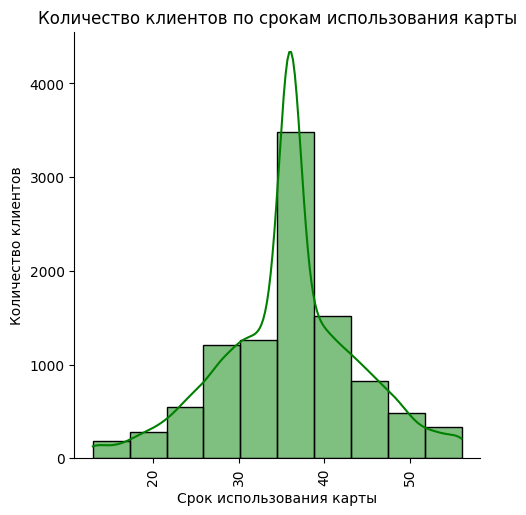

In [24]:
ax = sns.displot(data = cards, x = 'months_on_book', color = 'green', bins = 10, kde = True)
ax.fig.set_figheight(5)
ax.fig.set_figwidth(5)
plt.xticks(rotation = 90)
plt.title('Количество клиентов по срокам использования карты')
plt.xlabel('Срок использования карты')
plt.ylabel('Количество клиентов')

In [25]:
top_activ = cards.groupby('attrition_flag')['attrition_flag'].count()
activity = top_activ.index

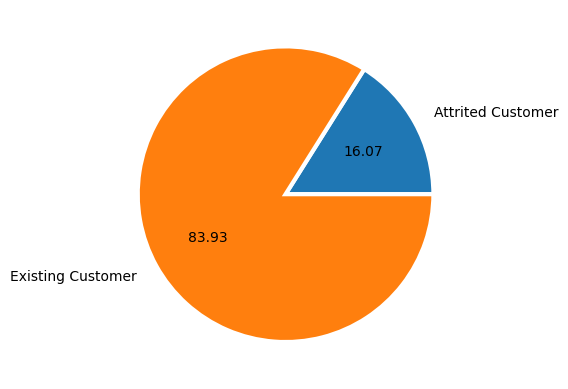

In [26]:
plt.pie(x = top_activ, labels = activity, labeldistance = 1.15, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct = "%.2f");
plt.show();

In [27]:
sex = cards['gender'].value_counts()
sex = pd.DataFrame({'gender': sex.index, 'count': sex.values}).sort_values('gender')
sex.head(100).sort_values(by=['count'], ascending = False)

,gender,count
0,F,5358
1,M,4769


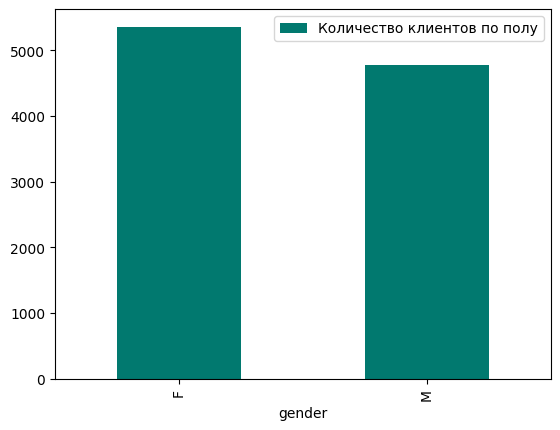

In [28]:
axe = sex.plot.bar(x = 'gender', y = 'count', label = 'Количество клиентов по полу', color = ['#01796F'])

In [29]:
top_level = cards.groupby('education_level')['education_level'].count()
education = top_level.index

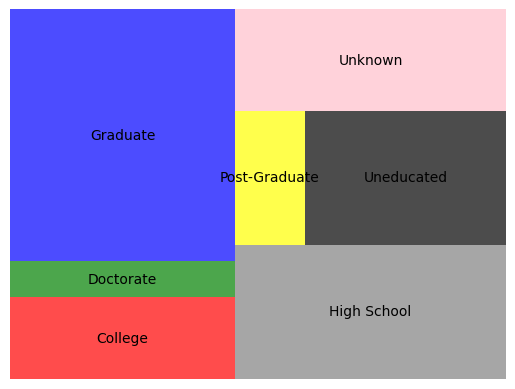

In [30]:
squarify.plot(sizes = top_level, label = education, color=["red","green","blue", "grey", "yellow", "black", "pink"], alpha=.7 )
plt.axis('off')
plt.show()

# Информация о корреляции признаков

C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_1444\680754909.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  m =np.triu(np.ones_like(cards.corr(), dtype=bool))
C:\Users\Xiaomi\AppData\Local\Temp\ipykernel_1444\680754909.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cards.corr(), mask = m, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r');


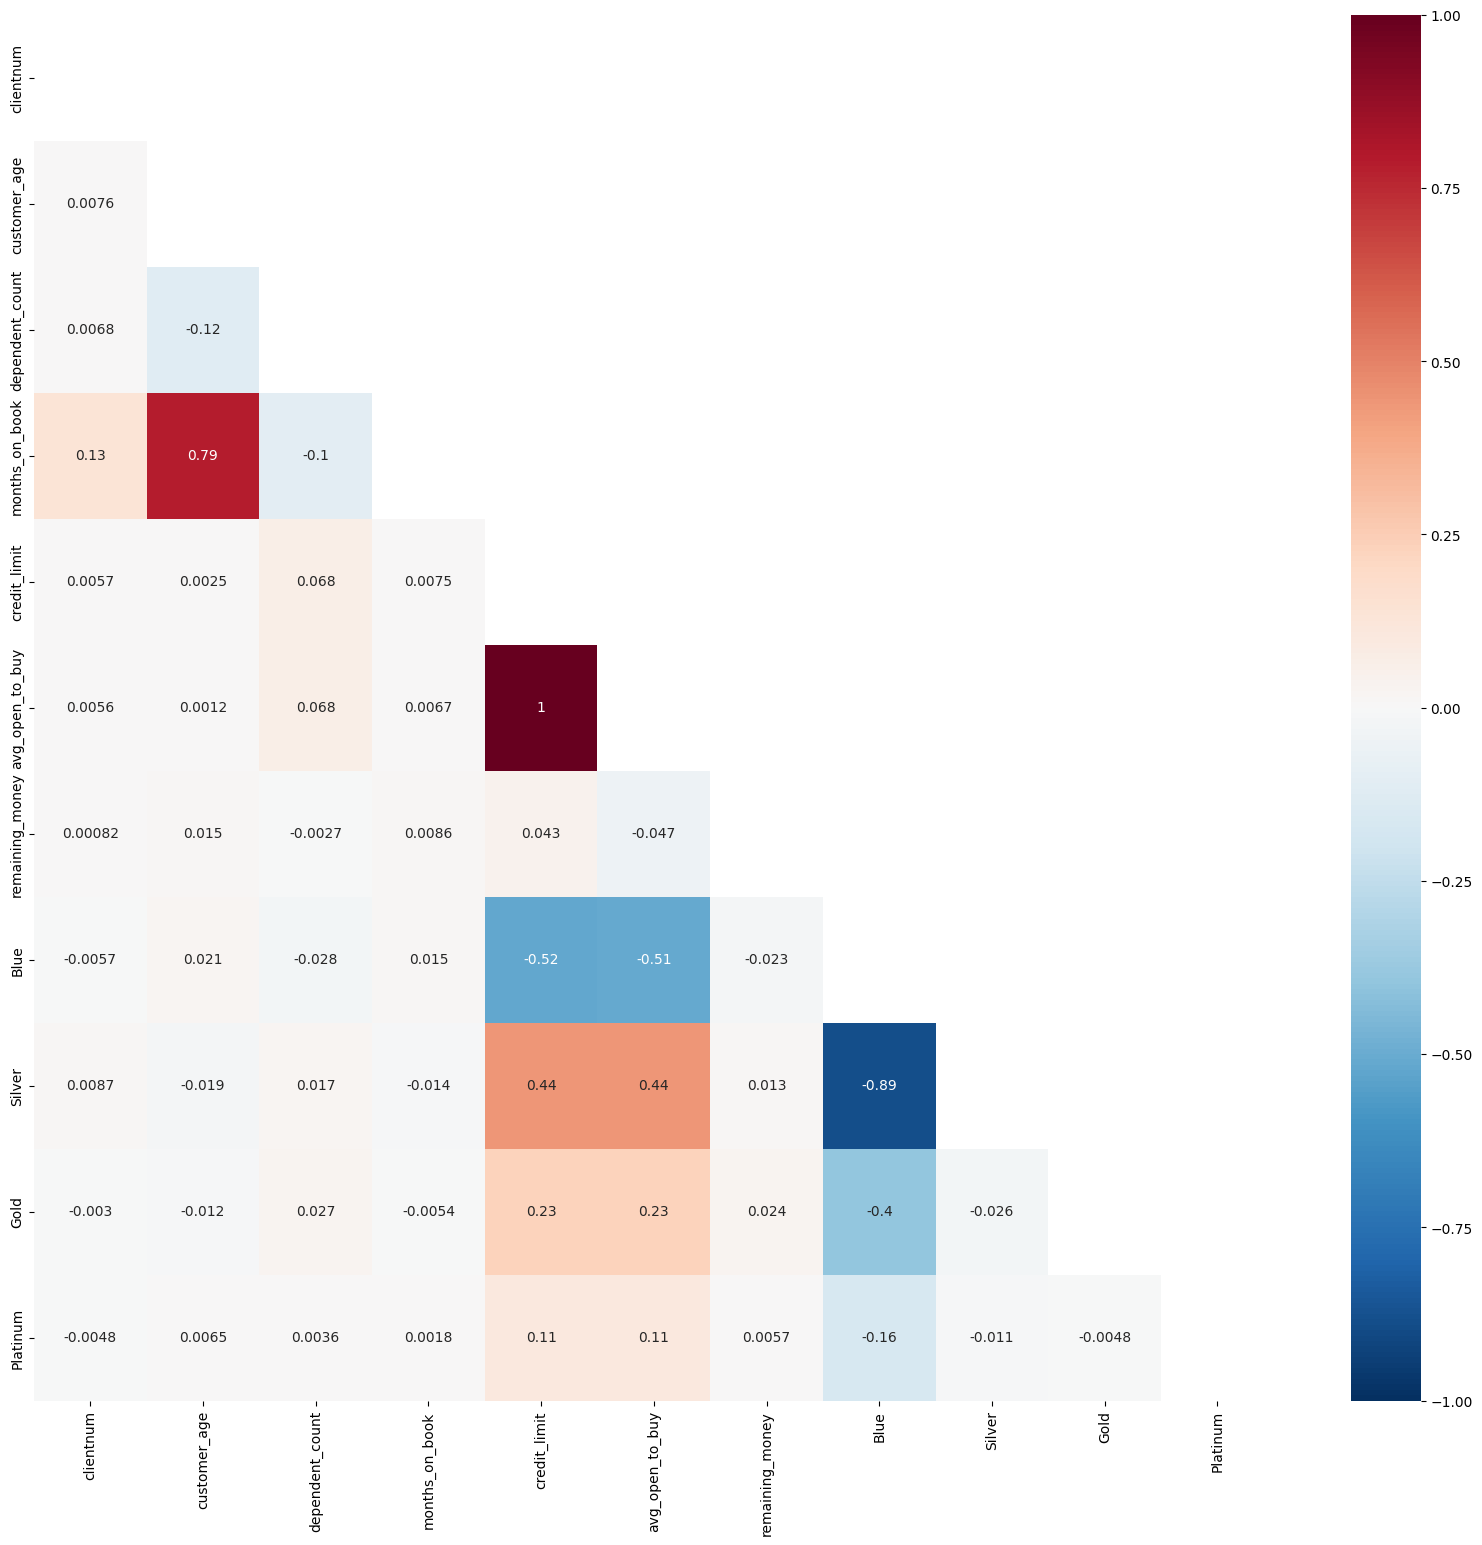

In [31]:
plt.figure(figsize = (20,18))

m =np.triu(np.ones_like(cards.corr(), dtype=bool))

sns.heatmap(cards.corr(), mask = m, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r');